In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

##Loading Dataset


In [ ]:
df = pd.read_csv("/content/Steel_industry_data.csv", parse_dates=["date"])
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


#**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,2018-12-31 00:00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [ ]:
df.shape

(35040, 11)

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.value_counts()

date                 Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor  NSM    WeekStatus  Day_of_week  Load_Type  
2018-01-01 00:00:00  3.42       3.46                                  0.00                                  0.00       70.30                         100.00                        0      Weekday     Monday       Light_Load     1
2018-09-01 08:30:00  83.74      56.99                                 0.00                                  0.04       82.67                         100.00                        30600  Weekday     Tuesday      Light_Load     1
2018-09-01 07:00:00  4.57       3.89                                  0.00                                  0.00       76.15                         100.00                        25200  Weekday     Tuesday      Light_Load     1
2018-09-01 07:15:00  4.10       3.28                                  0.00                   

In [ ]:
df.value_counts(normalize=True)

date                 Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor  NSM    WeekStatus  Day_of_week  Load_Type  
2018-01-01 00:00:00  3.42       3.46                                  0.00                                  0.00       70.30                         100.00                        0      Weekday     Monday       Light_Load     0.000029
2018-09-01 08:30:00  83.74      56.99                                 0.00                                  0.04       82.67                         100.00                        30600  Weekday     Tuesday      Light_Load     0.000029
2018-09-01 07:00:00  4.57       3.89                                  0.00                                  0.00       76.15                         100.00                        25200  Weekday     Tuesday      Light_Load     0.000029
2018-09-01 07:15:00  4.10       3.28                                  0.

In [ ]:
df.Leading_Current_Reactive_Power_kVarh.describe()

count    35040.000000
mean         3.870949
std          7.424463
min          0.000000
25%          0.000000
50%          0.000000
75%          2.090000
max         27.760000
Name: Leading_Current_Reactive_Power_kVarh, dtype: float64

In [ ]:
print(f"Skewness: {df['Leading_Current_Reactive_Power_kVarh'].skew()}")
print(f"Kurtosis: {df['Leading_Current_Reactive_Power_kVarh'].kurt()}")

Skewness: 1.7343137431298614
Kurtosis: 1.5810971096311754


In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
df['date'].unique()

array(['2018-01-01T00:15:00.000000000', '2018-01-01T00:30:00.000000000',
       '2018-01-01T00:45:00.000000000', ...,
       '2018-12-31T23:30:00.000000000', '2018-12-31T23:45:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df['Usage_kWh'].unique()

array([ 3.17,  4.  ,  3.24, ..., 21.89, 17.82, 45.  ])

In [ ]:
df['Lagging_Current_Reactive.Power_kVarh'].unique()

array([ 2.95,  4.46,  3.28, ..., 69.77, 74.56, 70.67])

In [ ]:
df['Leading_Current_Reactive_Power_kVarh'].unique()

array([ 0.  ,  0.18, 15.66, 16.96, 21.28, 19.22, 16.88, 22.32, 18.  ,
       16.92, 23.4 ,  5.65,  4.82,  6.7 ,  4.57, 12.89, 23.15, 16.67,
       16.63, 23.33, 16.74, 16.99, 18.25, 22.1 , 16.7 , 19.33, 21.35,
       16.81, 20.45, 20.77, 21.64, 19.19, 23.51, 17.39, 17.35,  8.96,
        5.47, 16.24, 22.57, 20.74, 20.88, 22.54, 19.55, 17.42, 24.26,
       17.75, 25.2 , 17.5 , 10.08,  0.07,  0.11,  0.94,  1.15,  0.54,
        0.14, 18.9 , 25.92, 25.34, 25.49,  6.52,  1.04,  0.5 ,  1.58,
        0.43,  1.37,  0.47,  3.96, 12.13, 23.22, 25.16, 26.5 , 26.42,
       26.46, 15.44,  0.04, 26.21, 25.56, 25.74,  6.08,  1.69,  1.94,
        0.79,  1.66,  1.22,  6.98, 23.83, 24.8 , 26.82, 26.78, 15.16,
       18.79, 26.39, 26.89,  1.19,  3.46,  2.12,  2.77, 24.08, 25.78,
       25.85, 14.65, 20.2 , 26.32, 25.81,  7.6 ,  3.56,  0.61,  4.43,
       17.64, 24.05, 26.68, 26.64, 26.6 , 15.19, 20.7 , 20.99, 19.73,
       17.93,  9.9 ,  7.06,  7.63,  7.42, 14.08, 24.91, 19.69, 18.14,
       20.92, 21.67,

In [ ]:
df['CO2(tCO2)'].unique()

array([0.  , 0.02, 0.03, 0.05, 0.06, 0.04, 0.01, 0.07])

In [ ]:
df['Lagging_Current_Power_Factor'].unique()

array([73.21, 66.77, 70.28, ..., 73.73, 69.2 , 64.38])

In [ ]:
df['Leading_Current_Power_Factor'].unique()

array([100.  ,  99.87,  24.11, ...,  26.21,  57.73,  31.65])

In [ ]:
df['NSM'].unique()

array([  900,  1800,  2700,  3600,  4500,  5400,  6300,  7200,  8100,
        9000,  9900, 10800, 11700, 12600, 13500, 14400, 15300, 16200,
       17100, 18000, 18900, 19800, 20700, 21600, 22500, 23400, 24300,
       25200, 26100, 27000, 27900, 28800, 29700, 30600, 31500, 32400,
       33300, 34200, 35100, 36000, 36900, 37800, 38700, 39600, 40500,
       41400, 42300, 43200, 44100, 45000, 45900, 46800, 47700, 48600,
       49500, 50400, 51300, 52200, 53100, 54000, 54900, 55800, 56700,
       57600, 58500, 59400, 60300, 61200, 62100, 63000, 63900, 64800,
       65700, 66600, 67500, 68400, 69300, 70200, 71100, 72000, 72900,
       73800, 74700, 75600, 76500, 77400, 78300, 79200, 80100, 81000,
       81900, 82800, 83700, 84600, 85500,     0])

In [ ]:
df['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
df['Day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [ ]:
df.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


#**DATA VISUALIZATION**

In [ ]:
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
2018-01-01 00:00:00,3.42
2018-01-01 00:15:00,3.17
2018-01-01 00:30:00,4.00
2018-01-01 00:45:00,3.24
2018-01-01 01:00:00,3.31
2018-01-01 01:15:00,3.82
2018-01-01 01:30:00,3.28
2018-01-01 01:45:00,3.60
2018-01-01 02:00:00,3.60


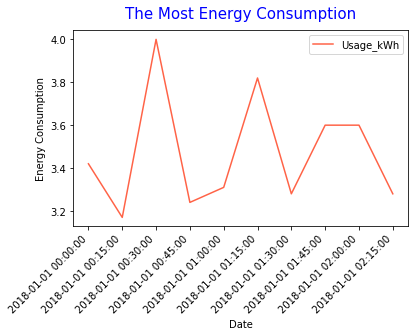

In [ ]:
chart = most_energy_consumption[:10].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
date=['2018-01-01 00:00:00','2018-01-01 00:15:00','2018-01-01 00:30:00','2018-01-01 00:45:00','2018-01-01 01:00:00','2018-01-01 01:15:00','2018-01-01 01:30:00','2018-01-01 01:45:00','2018-01-01 02:00:00','2018-01-01 02:15:00']
chart.set_xticklabels(date, rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

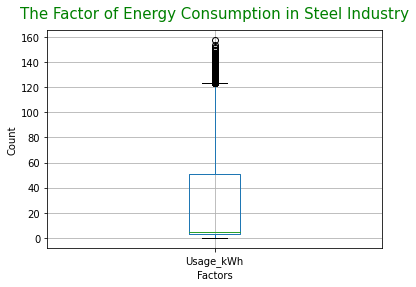

In [ ]:
chart = df.boxplot(column = ['Usage_kWh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

USAGE_KWH:

          min	0.000000
          25%	3.200000
          50%	4.570000
          75%	51.237500
          max	157.180000

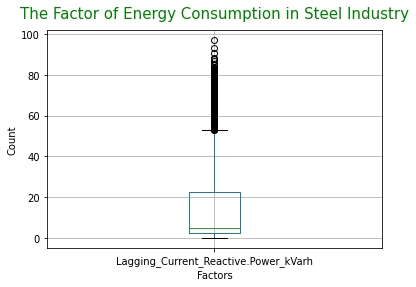

In [ ]:
chart = df.boxplot(column = ['Lagging_Current_Reactive.Power_kVarh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

Lagging_Current_Reactive.Power_kVarh:

    

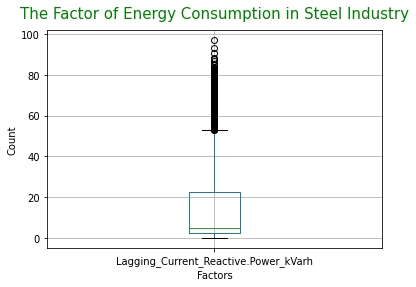

In [ ]:
chart = df.boxplot(column = ['Lagging_Current_Reactive.Power_kVarh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

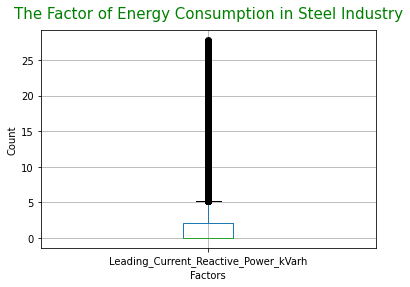

In [ ]:
chart = df.boxplot(column = ['Leading_Current_Reactive_Power_kVarh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

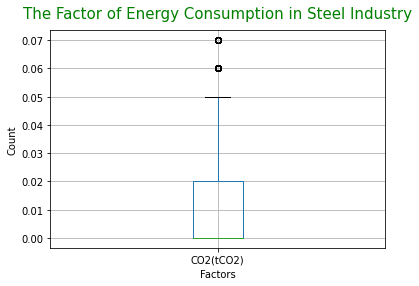

In [ ]:
chart = df.boxplot(column = ['CO2(tCO2)'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

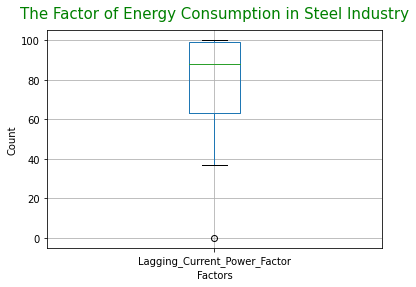

In [ ]:
chart = df.boxplot(column = ['Lagging_Current_Power_Factor'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

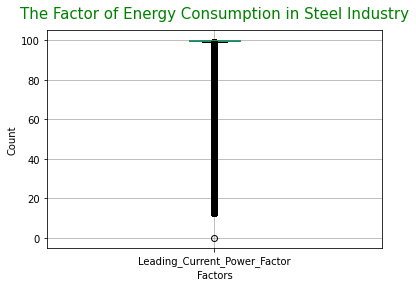

In [ ]:
chart = df.boxplot(column = ['Leading_Current_Power_Factor'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

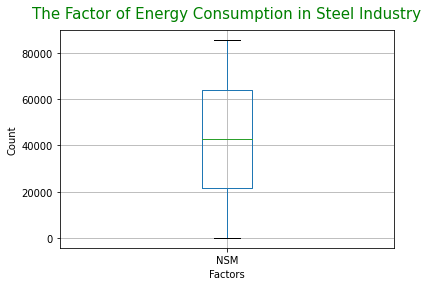

In [ ]:
chart = df.boxplot(column = ['NSM'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [ ]:
#analyze of energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'],
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

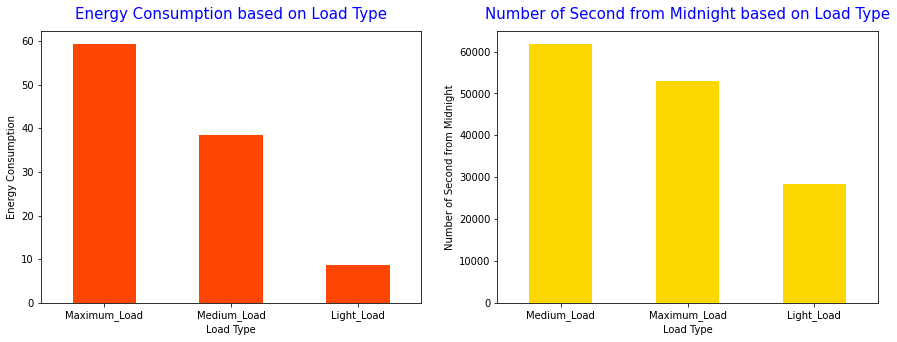

In [ ]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

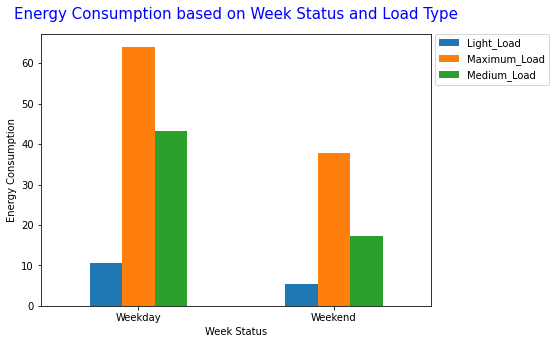

In [ ]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

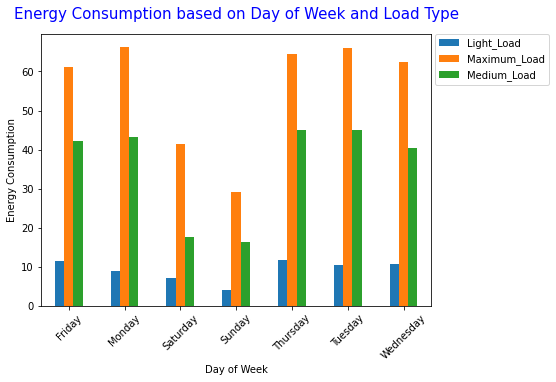

In [ ]:
#visualize energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

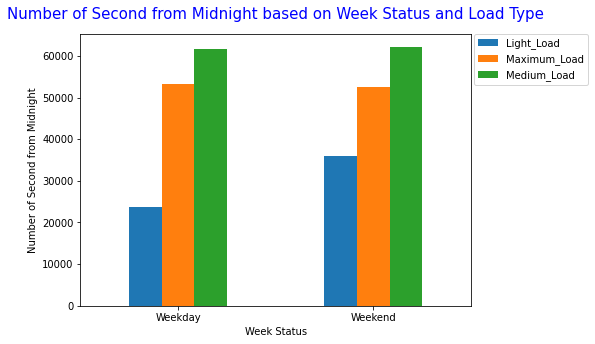

In [ ]:
#visualize number of second from midnight based on week status and load type
chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

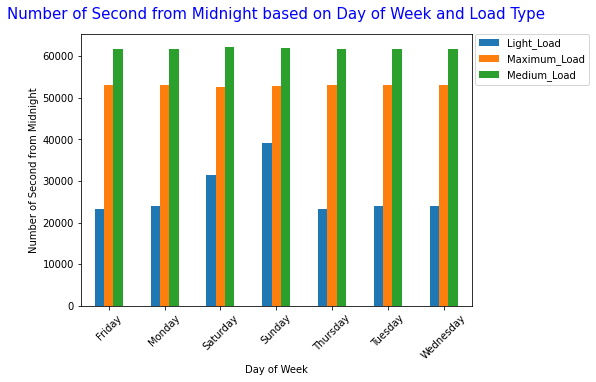

In [ ]:
#visualize number of second from midnight based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

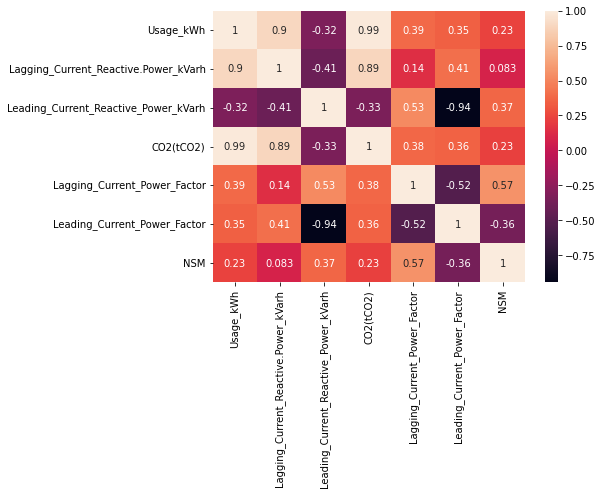

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

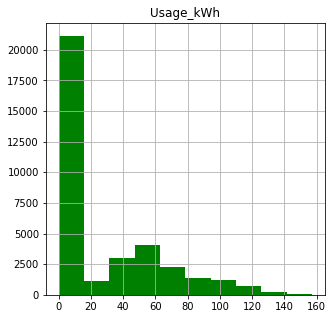

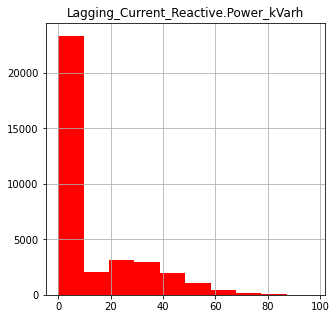

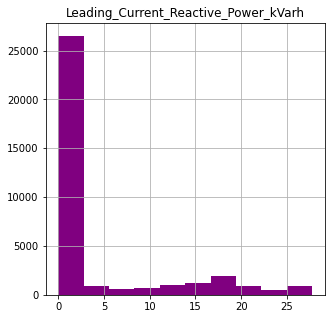

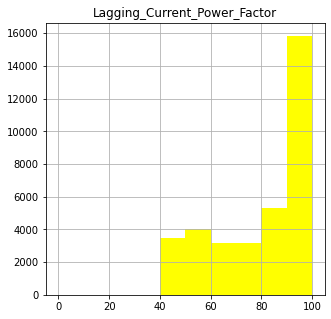

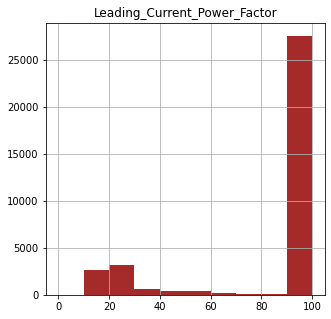

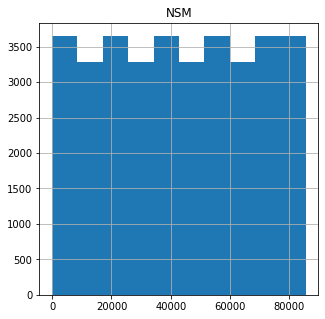

In [ ]:
df.hist(column='Usage_kWh',figsize = (5,5),color="green")
df.hist(column='Lagging_Current_Reactive.Power_kVarh',figsize = (5,5),color="red")
df.hist(column='Leading_Current_Reactive_Power_kVarh',figsize = (5,5),color="purple")
df.hist(column='Lagging_Current_Power_Factor',figsize = (5,5),color="yellow")
df.hist(column='Leading_Current_Power_Factor',figsize = (5,5),color="brown")
df.hist(column='NSM',figsize = (5,5))
plt.show()

#**FEATURE** **ENGINEERING**



1. Feature Splitting

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["Date"] = df["date"].dt.date
df["Time"] = df["date"].dt.time
df.drop(["date"], axis=1, inplace=True)
print(df.columns)
df = df[[ 'Date', 'Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type']]
df

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Date', 'Time'],
      dtype='object')


,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


2. Handling Outliers

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Usage_kWh

Max Value: 157.18
Min Value: 0.0
Lower Limit: -68.85624999999999
Upper Limit: 123.29374999999999


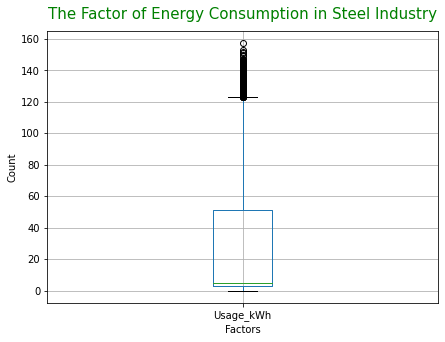

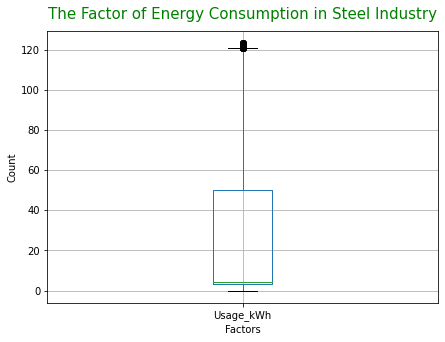

In [ ]:
Q1 = df["Usage_kWh"].quantile(0.25)
Q3 = df["Usage_kWh"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Max Value:" , df["Usage_kWh"].max())
print("Min Value:" , df["Usage_kWh"].min())

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

chart = df.boxplot(column = ['Usage_kWh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

new_df = df[(df["Usage_kWh"] > lower_limit) & (df["Usage_kWh"] < upper_limit)]
new_df


chart = new_df.boxplot(column = ['Usage_kWh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

Lagging_Current_Reactive.Power_kVarh

Max Value: 96.91
Min Value: 0.0
Lower Limit: -28.209999999999997
Upper Limit: 53.15


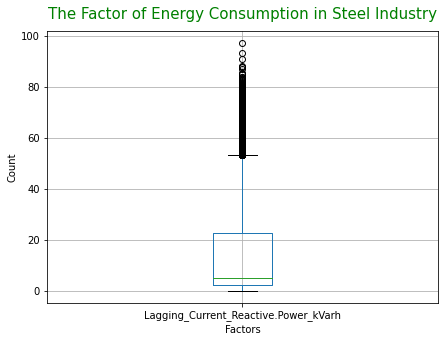

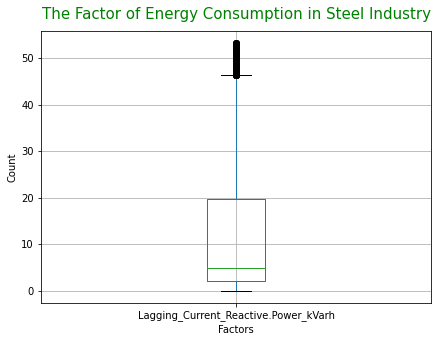

In [ ]:
Q1 = df["Lagging_Current_Reactive.Power_kVarh"].quantile(0.25)
Q3 = df["Lagging_Current_Reactive.Power_kVarh"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Max Value:" , df["Lagging_Current_Reactive.Power_kVarh"].max())
print("Min Value:" , df["Lagging_Current_Reactive.Power_kVarh"].min())

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

chart = df.boxplot(column = ['Lagging_Current_Reactive.Power_kVarh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

new_df = df[(df["Lagging_Current_Reactive.Power_kVarh"] > lower_limit) & (df["Lagging_Current_Reactive.Power_kVarh"] < upper_limit)]
new_df

chart = new_df.boxplot(column = ['Lagging_Current_Reactive.Power_kVarh'])
chart.set_xticklabels(chart.get_xticklabels())
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'green', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()


Leading_Current_Reactive_Power_kVarh

In [ ]:
Q1 = df["Leading_Current_Reactive_Power_kVarh"].quantile(0.25)
Q3 = df["Leading_Current_Reactive_Power_kVarh"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Max Value:" , df["Leading_Current_Reactive_Power_kVarh"].max())
print("Min Value:" , df["Leading_Current_Reactive_Power_kVarh"].min())

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)



new_df = df[(df["Leading_Current_Reactive_Power_kVarh"] > lower_limit) & (df["Leading_Current_Reactive_Power_kVarh"] < upper_limit)]
new_df




Max Value: 27.76
Min Value: 0.0
Lower Limit: -3.135
Upper Limit: 5.225


,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


Lagging_Current_Power_Factor

In [ ]:
Q1 = df["Lagging_Current_Power_Factor"].quantile(0.25)
Q3 = df["Lagging_Current_Power_Factor"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Max Value:" , df["Lagging_Current_Power_Factor"].max())
print("Min Value:" , df["Lagging_Current_Power_Factor"].min())

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)



new_df = df[(df["Lagging_Current_Power_Factor"] > lower_limit) & (df["Lagging_Current_Power_Factor"] < upper_limit)]
new_df




Max Value: 100.0
Min Value: 0.0
Lower Limit: 9.766250000000007
Upper Limit: 152.57625


,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


Leading_Current_Power_Factor

In [ ]:
Q1 = df["Leading_Current_Power_Factor"].quantile(0.25)
Q3 = df["Leading_Current_Power_Factor"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Max Value:" , df["Leading_Current_Power_Factor"].max())
print("Min Value:" , df["Leading_Current_Power_Factor"].min())

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

new_df = df[(df["Leading_Current_Power_Factor"] > lower_limit) & (df["Leading_Current_Power_Factor"] < upper_limit)]
new_df




Max Value: 100.0
Min Value: 0.0
Lower Limit: 99.25
Upper Limit: 100.44999999999999


,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


3. Handling NaN values

In [ ]:
df.isna().sum()

Date                                    0
Time                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [ ]:
df = df.fillna({
    "Usage_kWh": df["Usage_kWh"].mean(),
    "Lagging_Current_Reactive.Power_kVarh":df["Lagging_Current_Reactive.Power_kVarh"].mean(),
    "Leading_Current_Reactive_Power_kVarh":df["Leading_Current_Reactive_Power_kVarh"].mode(),
    "CO2(tCO2)":df["CO2(tCO2)"].mode(),
    "Lagging_Current_Power_Factor":df["Lagging_Current_Power_Factor"].interpolate(method="time"),
    "Leading_Current_Power_Factor":df["Leading_Current_Power_Factor"].interpolate(method="time"),
    "NSM":df["NSM"].interpolate(method="time"),
    "WeekStatus": df["WeekStatus"].mode(),
    "Day_of_week": df["Day_of_week"].interpolate(method="time"),
    "Load_Type": df["Load_Type"].interpolate(method="time")
})

df

,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


4. Ordinal Encoding for "days in week" and "Load_Type"






In [ ]:
ord1 = OrdinalEncoder()

ord1.fit([df['Day_of_week']])

df['Day_of_week'] = ord1.fit_transform(df[['Day_of_week']])
# df.sample(10)

ord1.fit([df['Load_Type']])

df['Load_Type'] = ord1.fit_transform(df[['Load_Type']])
df.head(10)

,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01,00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,1.0,0.0
1,2018-01-01,00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,1.0,0.0
2,2018-01-01,00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,1.0,0.0
3,2018-01-01,01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,1.0,0.0
4,2018-01-01,01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,1.0,0.0
5,2018-01-01,01:30:00,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,1.0,0.0
6,2018-01-01,01:45:00,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,1.0,0.0
7,2018-01-01,02:00:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,1.0,0.0
8,2018-01-01,02:15:00,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,1.0,0.0
9,2018-01-01,02:30:00,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,1.0,0.0


5. One Hot Encoding for WeekStatus

1.   List item
2.   List item



In [ ]:
enc = OneHotEncoder()

enc = enc.fit_transform(df[['WeekStatus']]).toarray()
encoded_colm = pd.DataFrame(enc)

df = pd.concat([df, encoded_colm], axis = 1)

df = df.drop(['WeekStatus'], axis = 1)
df.rename(columns = {0:"Weekday", 1:"Weekend"}, inplace=True)
df.head(10)


,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,Weekday,Weekend
0,2018-01-01,00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1.0,0.0,1.0,0.0
1,2018-01-01,00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1.0,0.0,1.0,0.0
2,2018-01-01,00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1.0,0.0,1.0,0.0
3,2018-01-01,01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1.0,0.0,1.0,0.0
4,2018-01-01,01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1.0,0.0,1.0,0.0
5,2018-01-01,01:30:00,3.28,3.56,0.0,0.0,67.76,100.0,5400,1.0,0.0,1.0,0.0
6,2018-01-01,01:45:00,3.60,4.14,0.0,0.0,65.62,100.0,6300,1.0,0.0,1.0,0.0
7,2018-01-01,02:00:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,1.0,0.0,1.0,0.0
8,2018-01-01,02:15:00,3.28,3.64,0.0,0.0,66.94,100.0,8100,1.0,0.0,1.0,0.0
9,2018-01-01,02:30:00,3.78,4.72,0.0,0.0,62.51,100.0,9000,1.0,0.0,1.0,0.0


#**TRAINING** **THE** **MODEL** **USING** **LINEAR** **REGRESSION**

In [ ]:
df_t=df.copy()


In [ ]:
df_t.isna().sum()

Date                                    0
Time                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Day_of_week                             0
Load_Type                               0
Weekday                                 0
Weekend                                 0
dtype: int64

In [ ]:
# filling the null values
from sklearn.impute import SimpleImputer
s_i=SimpleImputer()
df_t['Lagging_Current_Reactive.Power_kVarh']=s_i.fit_transform(df['Lagging_Current_Reactive.Power_kVarh'].values.reshape(-1,1))[:,0]
df_t['Leading_Current_Reactive_Power_kVarh']=s_i.fit_transform(df['Leading_Current_Reactive_Power_kVarh'].values.reshape(-1,1))[:,0]
df_t['CO2(tCO2)']=s_i.fit_transform(df['CO2(tCO2)'].values.reshape(-1,1))[:,0]
df_t['Lagging_Current_Power_Factor']=s_i.fit_transform(df['Lagging_Current_Power_Factor'].values.reshape(-1,1))[:,0]
df_t['Leading_Current_Power_Factor']=s_i.fit_transform(df['Leading_Current_Power_Factor'].values.reshape(-1,1))[:,0]
df_t['NSM']=s_i.fit_transform(df['NSM'].values.reshape(-1,1))[:,0]
df_t['Day_of_week']=s_i.fit_transform(df['Day_of_week'].values.reshape(-1,1))[:,0]
df_t['Load_Type']=s_i.fit_transform(df['Load_Type'].values.reshape(-1,1))[:,0]
df_t['Weekday']=s_i.fit_transform(df['Weekday'].values.reshape(-1,1))[:,0]
df_t['Weekend']=s_i.fit_transform(df['Weekend'].values.reshape(-1,1))[:,0]
df_t['Usage_kWh']=s_i.fit_transform(df['Usage_kWh'].values.reshape(-1,1))[:,0]

In [ ]:
#Extracting our independent variables

x=df_t.drop(['Date', 'Time', 'Usage_kWh'], axis=1)

In [ ]:
y=df_t['Usage_kWh'].values.reshape(-1,1)

In [ ]:
#spltting the data into train data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=42)


In [ ]:
len(y_test)

10512

In [ ]:
#training our model with the train data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer

LR=LinearRegression(fit_intercept=True)
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
#predicting the values for the test data
y_predict=LR.predict(x_test)

In [ ]:
#checking the score of the model
from sklearn import metrics
print(metrics.r2_score(y_test, y_predict))

0.9841258647090525


In [ ]:
#checking the errors
import numpy as np
print("MSE: ",metrics.mean_squared_error(y_test, y_predict))
print("MAE: ",metrics.mean_absolute_error(y_test, y_predict))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MSE:  17.816863582570107
MAE:  2.548923999222686
RMSE:  4.221002675025225


#**Logistic Regression**

In [ ]:
df2 = df.copy()
#df2['Power_Consumption'] = np.where(df2['Load_Type'] == 'Maximum_Load', 1, 0)
conditions  = [df2['Load_Type'] == 0.0, (df2['Load_Type'] == 1.0) | (df2['Load_Type'] == 2.0)]
choices     = [0, 1]

df2["power_consumption"] = np.select(conditions, choices)
df2['power_consumption'].value_counts()

0    18072
1    16968
Name: power_consumption, dtype: int64

In [ ]:
df2['Usage_kWh'].isna().sum()
df2['Usage_kWh'].fillna(0, inplace=True)
df2['Usage_kWh'].isna().sum()

0

In [ ]:
data = np.array(df2['Usage_kWh']).reshape(-1, 1)
target = np.array(df2['power_consumption']).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train.ravel())
y_pred = log_regressor.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4090,  406],
       [1237, 3027]])

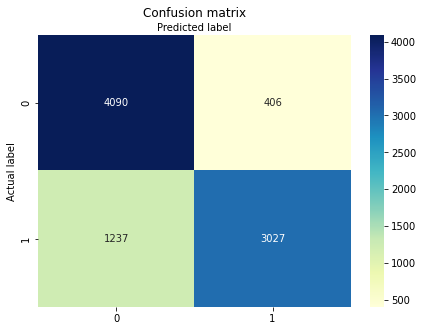

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not max load', 'max load']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not max load       0.77      0.91      0.83      4496
    max load       0.88      0.71      0.79      4264

    accuracy                           0.81      8760
   macro avg       0.82      0.81      0.81      8760
weighted avg       0.82      0.81      0.81      8760



In [ ]:
df2['Load_Type'].value_counts()

0.0    18072
2.0     9696
1.0     7272
Name: Load_Type, dtype: int64

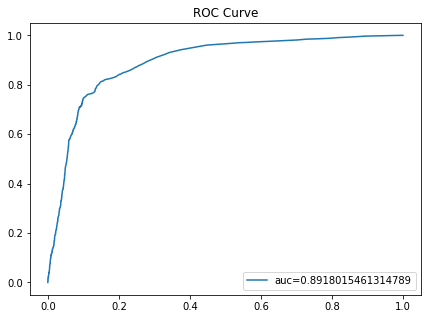

In [ ]:
y_pred_prob = log_regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

In [ ]:
df

,Date,Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,Weekday,Weekend
0,2018-01-01,00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,1.0,0.0,1.0,0.0
1,2018-01-01,00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,1.0,0.0,1.0,0.0
2,2018-01-01,00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,1.0,0.0,1.0,0.0
3,2018-01-01,01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1.0,0.0,1.0,0.0
4,2018-01-01,01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1.0,0.0,1.0,0.0
35036,2018-12-31,23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,1.0,0.0,1.0,0.0
35037,2018-12-31,23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,1.0,0.0,1.0,0.0
35038,2018-12-31,23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns


### KNN

## Plotting the scatter plot for visualising the clusters

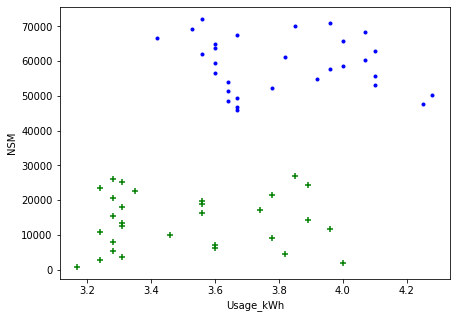

In [ ]:
df = pd.read_csv("/content/Steel_industry_data.csv")
df = df.fillna({
    "Load_Type": df["Load_Type"].interpolate(method="time")
})


df_knn = df[["Usage_kWh", "NSM", "Load_Type"]]
df0 = df_knn[:30]
df1 = df_knn[50:80]
df2 = df_knn[100:]
plt.xlabel("Usage_kWh")
plt.ylabel("NSM")
plt.scatter(df0["Usage_kWh"], df0["NSM"], color="green", marker="+")
plt.scatter(df1["Usage_kWh"], df1["NSM"], color="blue", marker=".")


## Train-test splitting
Random state = 0

In [ ]:

x = df_knn[["Usage_kWh", "NSM"]]
y = df_knn["Load_Type"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=0) #random state 0


## Finding the optimal K value for neighbours

In [ ]:
k = range(1,100)
k_scores = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, x,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())

## Plotting the accuracy scores for each K

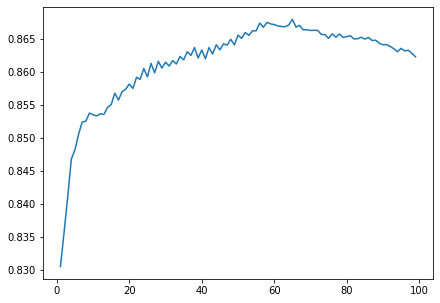

In [ ]:
sns.lineplot(x=k, y=k_scores)

Selecting the K value for which there is no overfitting or underfitting
k = 60

## Prediction using train-test split data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)
y_pred_knn

array(['Maximum_Load', 'Light_Load', 'Medium_Load', ..., 'Light_Load',
       'Light_Load', 'Light_Load'], dtype=object)

## Scores for train-test split data

In [ ]:
print("Accuracy of knn:", accuracy_score(y_test,y_pred_knn))
print("Precision of knn:", precision_score(y_test,y_pred_knn,average='micro'))
print("Recall of knn:", recall_score(y_test,y_pred_knn,average='micro'))
print("F1_score of knn:", f1_score(y_test,y_pred_knn,average='micro'))


Accuracy of knn: 0.8738584474885844
Precision of knn: 0.8738584474885844
Recall of knn: 0.8738584474885844
F1_score of knn: 0.8738584474885844


## Scores for prediction using cross validation

In [ ]:

k = KNeighborsClassifier()
scores_accuracy = cross_val_score(k, x, y, cv=10, scoring="accuracy")
print("Accuracy:", scores_accuracy)
scores_precision = cross_val_score(k, x, y, cv=10, scoring="precision_micro" )
print("\nPrecision:", scores_precision)
scores_recall = cross_val_score(k, x, y, cv=10, scoring="recall_micro")
print("\nRecall:",scores_recall)
scores_f1 = cross_val_score(k, x, y, cv=10, scoring="f1_micro")
print("\nF1_score:",scores_f1)




Accuracy: [0.76426941 0.80507991 0.90553653 0.89383562 0.8966895  0.90182648
 0.89240868 0.89212329 0.81535388 0.71489726]

Precision: [0.76426941 0.80507991 0.90553653 0.89383562 0.8966895  0.90182648
 0.89240868 0.89212329 0.81535388 0.71489726]

Recall: [0.76426941 0.80507991 0.90553653 0.89383562 0.8966895  0.90182648
 0.89240868 0.89212329 0.81535388 0.71489726]

F1_score: [0.76426941 0.80507991 0.90553653 0.89383562 0.8966895  0.90182648
 0.89240868 0.89212329 0.81535388 0.71489726]


In [ ]:
print("Accuracy:",scores_accuracy.mean())
print("Precision:",scores_precision.mean())
print("Recall:",scores_recall.mean() )
print("F1_score:", scores_f1.mean())

Accuracy: 0.8482020547945206
Precision: 0.8482020547945206
Recall: 0.8482020547945206
F1_score: 0.8482020547945206


## Confusion matrix and plot

In [ ]:
print("Knn")
print(confusion_matrix(y_test, y_pred_knn))

Knn
[[5196    3  226]
 [  53 1739  368]
 [ 193  483 2251]]


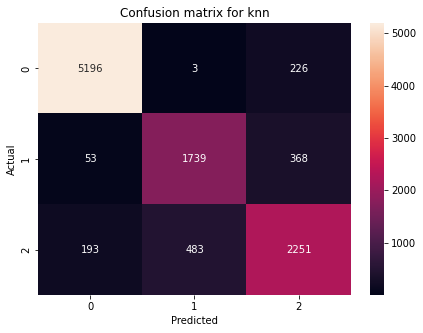

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(c_matrix, annot=True, fmt='d')
plt.title("Confusion matrix for knn")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

No.of true values greater than number of false values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn, squared=False))




ValueError: ignored

### Decision Tree

## Prediction using Train test split

In [ ]:

x = df_knn[["Usage_kWh", "NSM"]]
y = df_knn["Load_Type"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=0) #random state 0


dc = tree.DecisionTreeClassifier()
x_train = x_train[:500]
y_train = y_train[:500]
x_test = x_test[:50]
y_test = y_test[:50]

destree = dc.fit(x_train,y_train)
y_pred_dt = dc.predict(x_test)
y_pred_dt


## Decision tree plot

In [ ]:
fig = plt.figure(figsize=(100,75))
tree.plot_tree(destree, filled=True)
plt.show()


## Scores for prediction using train-test split data

In [ ]:
print("Accuracy of dtc:", accuracy_score(y_test,y_pred_dt))
print("Precision of dtc:", precision_score(y_test,y_pred_dt,average='micro'))
print("Recall of dtc:", recall_score(y_test,y_pred_dt,average='micro'))
print("F1_score of dtc:", f1_score(y_test,y_pred_dt,average='micro'))

## Scores for prediction using cross validation

In [ ]:
dtc = DecisionTreeClassifier()

scores_accuracy = cross_val_score(dtc, x, y, cv=10, scoring="accuracy")
print("Accuracy:", scores_accuracy)
scores_precision = cross_val_score(dtc, x, y, cv=10, scoring="precision_micro" )
print("\nPrecision:", scores_precision)
scores_recall = cross_val_score(dtc, x, y, cv=10, scoring="recall_micro")
print("\nRecall:",scores_recall)
scores_f1 = cross_val_score(dtc, x, y, cv=10, scoring="f1_micro")
print("\nF1_score:",scores_f1)




In [ ]:
print("Accuracy:",scores_accuracy.mean())
print("Precision:",scores_precision.mean())
print("Recall:",scores_recall.mean() )
print("F1_score:", scores_f1.mean())

## Confusion Matrix

In [ ]:
print("DTC")
print(confusion_matrix(y_test, y_pred_dt))

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(c_matrix, annot=True, fmt='d')
plt.title("Confusion matrix for DTC")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

No.of true values greater than number of false values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mae(y_test, y_pred_dt))
print(mse(y_test, y_pred_dt))
print(mae(y_test, y_pred_dt, squared=False))


